- Go to https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff
- right click on the page and click 'Save As' and name something ending with .arff

In [104]:
# ^^ directions for commencement for creating a csv
#weka data set 

In [105]:
# import pandas and arff for fast easy and exprssive data structure
import pandas as pd
import numpy as np 
import arff
import urllib2
import matplotlib.pyplot as plt
# importing library ^^ for plot production and interactive 2D data visualizations. 

from sklearn.ensemble import RandomForestClassifier 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                             accuracy_score, roc_auc_score)

### load the data with the path to the file and the name you gave it

In [106]:
# load the data, which is now stored in a dictionary

data_arff = arff.load(open('Dataset.arff', 'rb'))

In [107]:
# get the column names by calling the key 'attributes' and getting the first value in each tuple
column_names = [x[0] for x in data_arff['attributes']]

In [108]:
# load the data into a pandas data frame and set the column names
df = pd.DataFrame(data_arff['data'], columns = column_names)

In [109]:
# change the column types from 'object' to 'int'
df = df.astype(int)

In [110]:
df.Result = df.Result.map(lambda x: 0 if x <= -1 else 1)

In [114]:
df.to_csv('phishingdata.csv')

In [ ]:
df = pd.read_csv('phishingdata.csv')

In [115]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


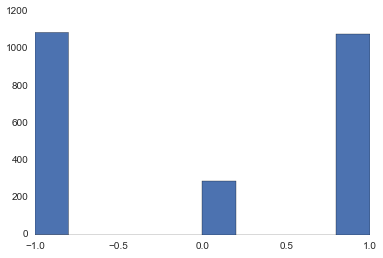

In [111]:
# quick look at Age of Domain feature with a histogram visualization 
df.age_of_domain.hist();

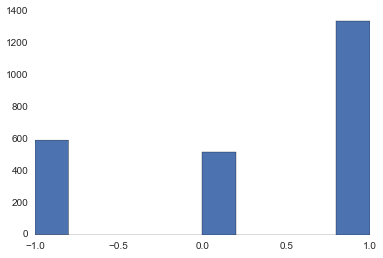

In [16]:
# quck look at Web Traffic feature with histogram visualization 
df.web_traffic.hist();

In [17]:
df_corr = df.corr()
#correlation matrix varialb e= df.corr

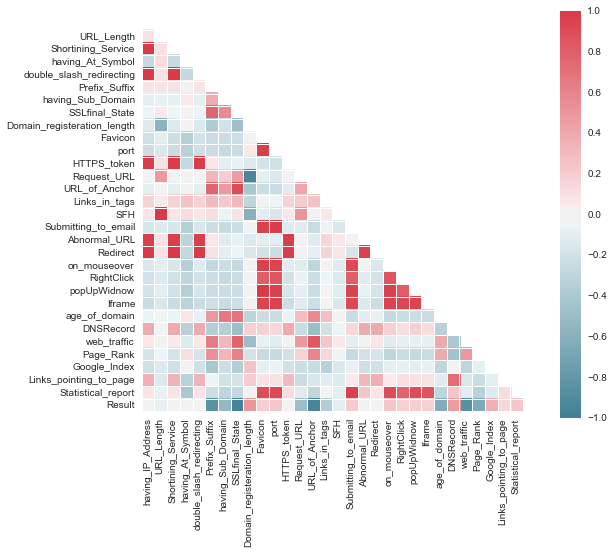

In [18]:
# plot each feature for visual understanding
# setting size of plot correlation matrix 
f, ax = plt.subplots(figsize=(9, 9))

#color palate
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plotting actual data
sns.corrplot(df_corr, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)

# ?
f.tight_layout()
#http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html

#plotting large correlational matrix

In [19]:
corr_series = df_corr.Result.abs().order(ascending = False)[1:]
# ordering correlation + or - first, from highest to lowest correlation, 
# getting all in series starting at first integer position [really always 2nd as 0 is always 1st]

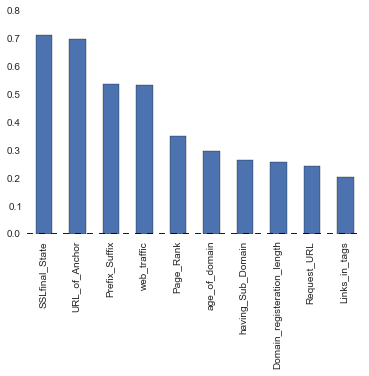

In [20]:
#plotting up to the 10th
corr_series[:10].plot(kind = 'bar');

In [21]:
corr_idx = corr_series [:10].index

In [22]:
corr_idx

Index([u'SSLfinal_State', u'URL_of_Anchor', u'Prefix_Suffix', u'web_traffic', u'Page_Rank', u'age_of_domain', u'having_Sub_Domain', u'Domain_registeration_length', u'Request_URL', u'Links_in_tags'], dtype='object')

In [23]:
#plt.rcParams['figure.figsize'] = (10.0, 50.0)

#def plot_notnull(df, col, idx):
#    return df.groupby(col).Result.mean().plot(kind = 'bar', title = col, ax=axs[idx]);

#fig, axs = plt.subplots(10,1)
#for ix, col in enumerate(corr_idx):
#    print plot_notnull(df, col, ix);

##### for col in corr_idx:
    #print df.groupby(col).Result.mean()

# Predictive  Model

In [24]:
df.groupby('URL_of_Anchor').Result.mean()
#taking attribute of -1 and adding up all results
#98% if it is -1 it will be either a fishing or a non fishing email 

URL_of_Anchor
-1               0.988858
 0               0.301165
 1               0.041045
Name: Result, dtype: float64

In [25]:
URL_df = df[['URL_of_Anchor', 'Result']]
#group by is taking attribute 

In [26]:
URL_df.head(10)

,URL_of_Anchor,Result
0,-1,1
1,0,1
2,0,1
3,0,1
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,-1,1


In [27]:
URL_df[URL_df.URL_of_Anchor == -1]
#Results is 1 when email with attribute of -1

,URL_of_Anchor,Result
0,-1,1
9,-1,1
10,-1,1
11,-1,1
12,-1,1
17,-1,1
18,-1,1
19,-1,1
23,-1,1
29,-1,1


In [28]:
URL_df[URL_df.URL_of_Anchor == -1].Result.mean()
# interesting strong predictor , though 1s and -1s so we will change to a percentage 

0.9888579387186629

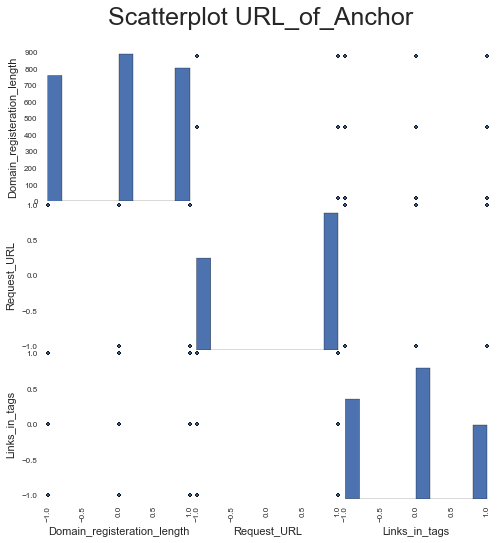

In [29]:
#more plotting 
pd.scatter_matrix(df[[u'Domain_registeration_length',
                      u'Request_URL',
                      u'Links_in_tags']],
                  figsize=(8,8))
plt.suptitle('Scatterplot URL_of_Anchor',size=25)

# Scatter Plot

In [30]:
#grouping feature to view mean and count
grouped1 = df.groupby('having_IP_Address').Result.agg(('mean', 'count'))
#list comprehension appending collumn name to indeces
grouped1.index = ['having_IP_Address' + str(string) for string in grouped1.index]
grouped1

,mean,count
having_IP_Address0,0.456382,2178
having_IP_Address1,0.359712,278


In [31]:

varsGrouped = pd.DataFrame()
# creating for loop for data frame 
for col in corr_series.index:
       
    grouped = df.groupby(col).Result.agg(['mean', 'count'])
# grouping by a single column
    grouped.index = [col + str(string) for string in grouped.index]
    varsGrouped = pd.concat([varsGrouped, grouped])

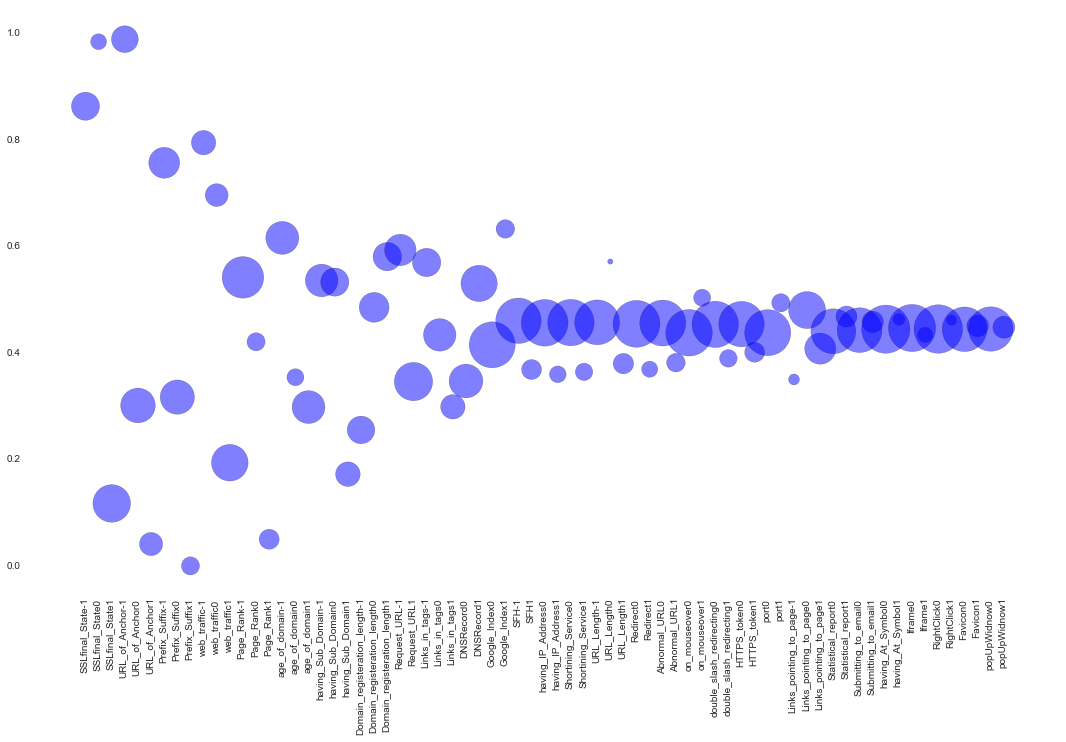

In [32]:
#importing scatter plot
from matplotlib.artist import setp
fig = plt.gcf()
# setting axes and size for scatter plot
fig.set_size_inches(18.5, 10.5)
x = range(len(varsGrouped.index))
y = varsGrouped['mean']

# function for setting vertical labels to the x axis
my_xticks = varsGrouped.index

plt.xticks(x, my_xticks)
plt.scatter(x,
           y,
           s = varsGrouped['count'],
           alpha = .5)
plt.xticks(rotation=90)
plt.ylim(-0.05,1.05)
plt.show()

In [33]:
# grouping all features to view mean and count
varsGrouped.head()

,mean,count
SSLfinal_State-1,0.862944,788
SSLfinal_State0,0.984127,252
SSLfinal_State1,0.117232,1416
URL_of_Anchor-1,0.988858,718
URL_of_Anchor0,0.301165,1202


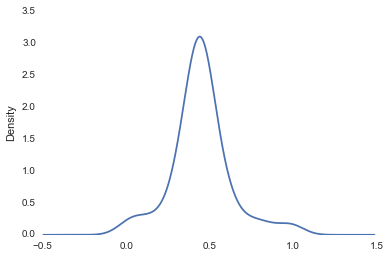

In [34]:
# should be weighted 
varsGrouped['mean'].plot(kind = 'kde')

In [35]:
# -1 is last collumn, all but Results
# setting = to var
X = df.ix[:,:-1]

# Result column
y = df.Result

In [36]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn import neighbors
n_neighbors=range(1, 101, 2)
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    # connect data to classification model and predictive ml alogrithm using Knearest neighbors
# http://www.galvanize.com/blog/2015/05/28/classifying-and-visualizing-musical-pitch-with-k-means-clustering/  

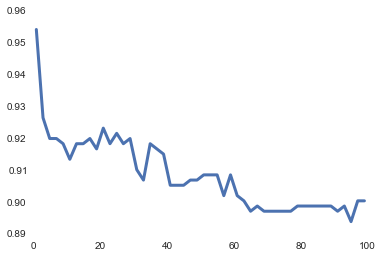

In [37]:
# fiting model x-train, y-train
# accuracy score plotted over 100 values of K
plt.plot(n_neighbors, scores, linewidth=3.0)

In [38]:
#Knearest neighbors above 
# Accuracy score is good, though not very promising for use of prediction

# Grouped features

In [39]:
#Using the Random Set (Section III-B), we tokenize each phishing URL by splitting it using 
#non-alphanumeric characters

# Graph Accuracy

# Modularizing

In [43]:
knn = neighbors.KNeighborsClassifier(1)
svc = svm.SVC(kernel='linear', probability=True)
nb = GaussianNB()
lr = LogisticRegression()
rf = RandomForestClassifier()

In [44]:
def plot_confusion_matrix(cm, cmap, title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    # True label = what it actually is
    plt.xlabel('Predicted label')

In [45]:
def plot_roc_curve(y_test, p_proba):
    # calculates: false positive rate, true positive rate, 
    fpr, tpr, thresholds = roc_curve(y_test, p_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= 'AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

In [46]:
def plt_Model(X_train, y_train, X_test, y_test, clf, cmap = plt.cm.Blues):
    fig = plt.figure()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print "Accuracy Score: ", accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print "\nConfusion Matrix:\n", cm
    plot_confusion_matrix(cm, cmap, title='Confusion matrix')
    p_proba = clf.predict_proba(X_test)
    fig = plt.figure()
    plot_roc_curve(y_test, p_proba)

Accuracy Score:  0.954397394137

Confusion Matrix:
[[328  18]
 [ 10 258]]


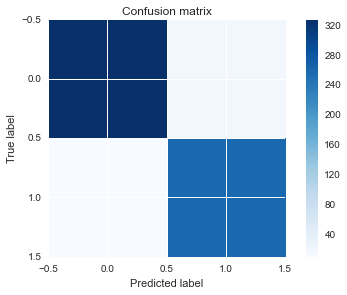

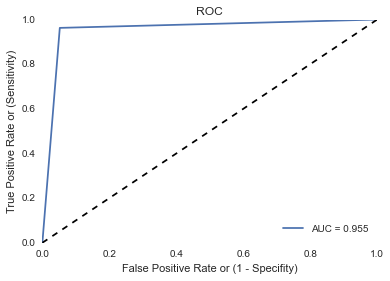

In [47]:
# Nearest Neighbors
plt_Model(X_train, y_train, X_test, y_test, knn,  cmap=plt.cm.Blues)

Accuracy Score:  0.92996742671

Confusion Matrix:
[[326  20]
 [ 23 245]]


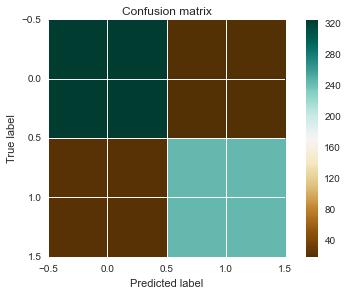

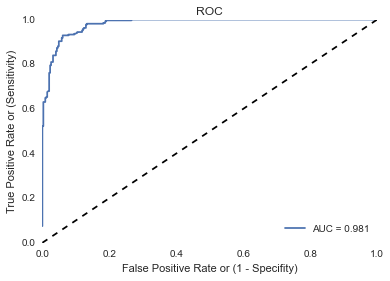

In [74]:
#Support Vector Machines (SVMs with rbf kernel) 
#SVMs(?? with linear kernel??)
plt_Model(X_train, y_train, X_test, y_test, svc, cmap=plt.cm.BrBG)

Accuracy Score:  0.920195439739

Confusion Matrix:
[[319  27]
 [ 22 246]]


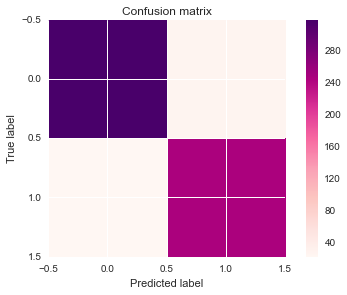

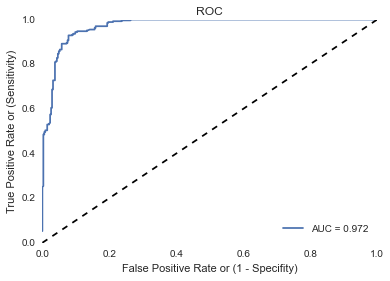

In [49]:
# Naïve Bayes (NB) 
plt_Model(X_train, y_train, X_test, y_test, nb, cmap=plt.cm.RdPu)

Accuracy Score:  0.92671009772

Confusion Matrix:
[[326  20]
 [ 25 243]]


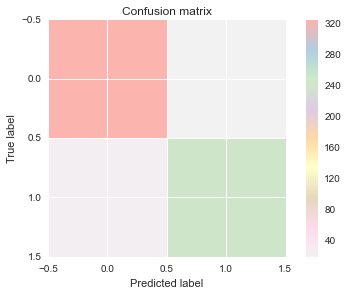

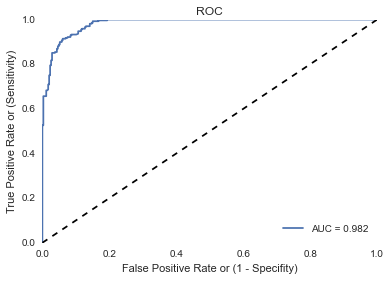

In [58]:
# Logistic Regression (LR)
plt_Model(X_train, y_train, X_test, y_test, lr, cmap=plt.cm.Pastel1_r)

Accuracy Score:  0.962540716612

Confusion Matrix:
[[333  13]
 [ 10 258]]


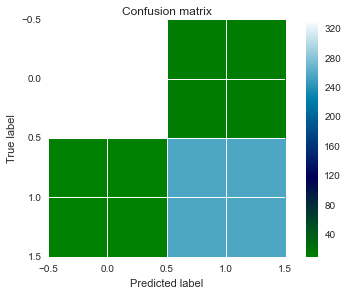

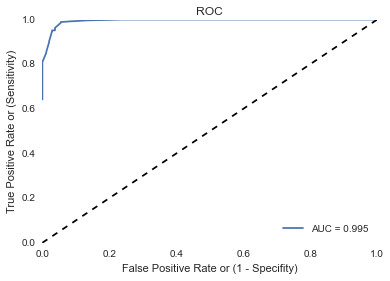

In [72]:
# Random Forest (RF) 
plt_Model(X_train, y_train, X_test, y_test, rf, cmap=plt.cm.ocean)

In [83]:
# Nearest Neighbors
#plt_Model(X_train, y_train, X_test, y_test, knn,  cmap=plt.cm.Blues)

In [82]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
for x in ['knn 0.954397394137', 'svm 0.92996742671', 'nb 0.920195439739', 'lr 0.92671009772', 'rf 0.962540716612']:
    print x

#access models, index, plot graph, specify tuple
#plt.plot(,scores, linewidth=3.0)


knn 0.954397394137
svm 0.92996742671
nb 0.920195439739
lr 0.92671009772
rf 0.962540716612


In [102]:
ModelScore = (0.954397394137, 0.92996742671, 0.920195439739, 0.92671009772, 0.962540716612)
print rf 


RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)


In [103]:
print ModelScore
print x 


(0.954397394137, 0.92996742671, 0.920195439739, 0.92671009772, 0.962540716612)
rf 0.962540716612


In [ ]:
#python interpreter
#$ python


In [ ]:
#data frame with percentages alongside graphs

In [ ]:
#upload data to project on GitHub
# http://archive.ics.uci.edu/ml/machine-learning-databases/00327/
# http://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff
# https://archive.ics.uci.edu/ml/datasets/Phishing+Websites

